<a href="https://colab.research.google.com/github/LoniQin/deep_learning_notebooks/blob/master/tensorflow/HousePricePredictorWithCustomTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Load and preprocess data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

57344/57026 [==============================] - 0s 0us/step


## Create Nerual Network

In [3]:
def mean_square_error(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

In [4]:
optimizer = tf.keras.optimizers.Adam()

In [6]:
model = keras.models.Sequential([
    keras.layers.InputLayer((13, )),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss=mean_square_error)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


## Train the Nerual Network

In [7]:
def train(model, x, y, optimizer, loss, epochs=1, batch_size=32):
  steps_per_epoch = x.shape[0] // batch_size
  if x.shape[0] % batch_size > 0:
    steps_per_epoch += 1
  losses = []
  for epoch in range(epochs):
    epoch_losses = []
    for step in range(steps_per_epoch):
      indices = np.random.choice(x.shape[0], batch_size)
      x_batch = x[indices]
      y_batch = y[indices]
      with tf.GradientTape() as t:
        current_loss = loss(model(x_batch), y_batch)
      gradients = t.gradient(current_loss, model.trainable_weights)
      optimizer.apply_gradients(zip(gradients, model.trainable_weights))
      epoch_losses.append(current_loss)
    losses.append(np.mean(epoch_losses))
  return losses

In [9]:
losses = train(model, x_train, y_train, optimizer, mean_square_error, epochs=500)

## Plot the learning curve

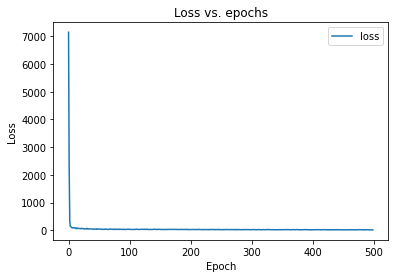

In [10]:
plt.plot(losses, label='loss')
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

## Predict data

In [12]:
y_pred = model.predict(x_test)

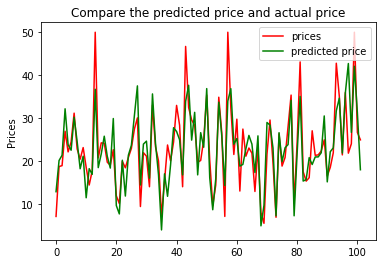

In [13]:
fig, ax = plt.subplots()
x = np.arange(y_test.shape[0])
ax.plot(y_test, label='prices', color='r')
ax.plot(y_pred, label='predicted price', color='g')
ax.set_ylabel('Prices')
ax.set_title("Compare the predicted price and actual price")
ax.legend()